## Data Science Principles and Practices


## Task 1– Maximum Likelihood Inference

In [326]:
#Loading the Quiet Don Data Set for analysis
#We use the read_csv function from the Pandas library to load the data
import pandas as pd
data = pd.read_csv("desktop/QuietDonSentenceLenghts.csv", header = None)
data

,0
0,6
1,25
2,12
3,10
4,16
...,...
3755,14
3756,6
3757,12
3758,7


In [328]:
#Calculating the mean and standard deviation for the sentence length data as follows:
import numpy as np

sample_mu = np.mean(data).astype(int)
print(sample_mu)
sample_sd = np.std(data).astype(int)
print(sample_sd)

0    12
dtype: int64
0    9
dtype: int64


In [348]:
#Calculating the maximum and minimum number of words that occured per line in the book
data_max = data.max()
data_min = data.min()
data_max, data_min

(0    65
 dtype: int64,
 0    1
 dtype: int64)

In [350]:
#The code below counts and sorts the number of times each unique word count has occured in the book
data1 = data[0].value_counts().sort_index().to_dict()
data1

{1: 84,
 2: 127,
 3: 150,
 4: 164,
 5: 159,
 6: 249,
 7: 246,
 8: 250,
 9: 233,
 10: 234,
 11: 180,
 12: 193,
 13: 158,
 14: 156,
 15: 139,
 16: 99,
 17: 113,
 18: 91,
 19: 98,
 20: 79,
 21: 63,
 22: 52,
 23: 49,
 24: 50,
 25: 30,
 26: 40,
 27: 19,
 28: 20,
 29: 28,
 30: 14,
 31: 17,
 32: 16,
 33: 21,
 34: 12,
 35: 9,
 36: 12,
 37: 9,
 38: 9,
 39: 10,
 40: 8,
 41: 10,
 42: 5,
 43: 7,
 44: 6,
 45: 3,
 46: 2,
 47: 4,
 48: 6,
 49: 2,
 50: 2,
 51: 4,
 52: 2,
 53: 1,
 54: 2,
 55: 3,
 56: 2,
 58: 1,
 61: 2,
 62: 1,
 63: 1,
 64: 3,
 65: 1}

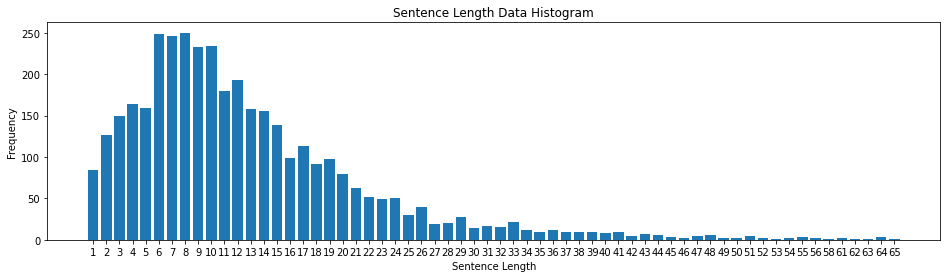

In [352]:
#The code below represents the data1 in a histogram to better understand the word count data

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(16,4))
ax.bar(range(len(data1)), list(data1.values()), align = 'center')
plt.xticks(range(len(data1)), list(data1.keys()))
plt.title("Sentence Length Data Histogram")
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.show()

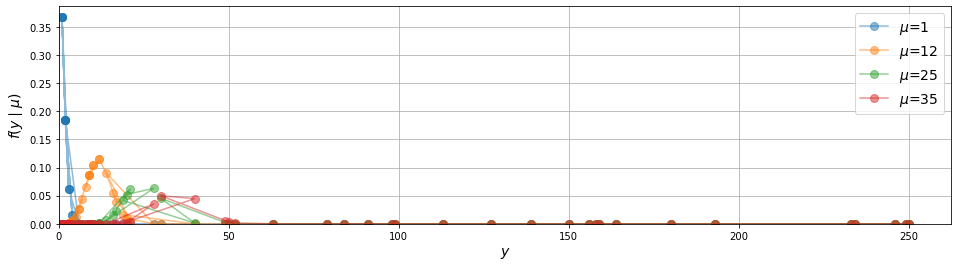

In [353]:
#The code below fits a Poisson distribution to the sentence length data

from scipy.stats import poisson

data2 = pd.Series(data1)

#poisson_pmf = lambda y, μ: μ**y / factorial(y) * exp(-μ)
y_values = data2

fig, ax = plt.subplots(figsize=(16, 4))

for mu in [1, 12, 25, 35]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson(mu).pmf(y_i))
    ax.plot(y_values,
            distribution,
            label=f'$\mu$={mu}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

### Fit a Poisson Distribution to Sentence Length Data using Maximum Likelihood
Now we use the statsmodel to perform maximum likelihood estimation. MLE is used to estimate the parameters of a statistical model given the observations, by finding the parameter values that maximise the likelihood of making the observations given the parameters.

In [349]:
!pip install statsmodels

To fit the poisson distribution to data using MLE, we need exog(x variable) and endog(yvariable). The x variable is the obviously the observation found in the sentence length data i.e. "data". For endog, build an array for the data shown by "y".

In [354]:
y = np.ones_like(data)
res = sm.Poisson(data,y).fit()

print(res.summary())
np.exp(res.params)

Optimization terminated successfully.
         Current function value: 4.947456
         Iterations 1
                          Poisson Regression Results                          
Dep. Variable:                      0   No. Observations:                 3760
Model:                        Poisson   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Tue, 05 Jan 2021   Pseudo R-squ.:                   0.000
Time:                        01:01:56   Log-Likelihood:                -18602.
converged:                       True   LL-Null:                       -18602.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.005    554.347      0.000       2.531       2.548


const    12.673138
dtype: float64

Maximum likelihood inference aims to find parameters that maximise the likelihood of the model, so that under the assumed statistical model the observed data is most probable. L(◊|x) = p(x|◊).
We could perform maximisation either using norm.fit() method of the appropriate scipy distribution or using the library function. Both the methods have been performed below. We can visualise how the likelihood changes as we change mu.

The norm code below generates two values, 12.67 represents the mean value and 9.12 represents standard deviation.

In [336]:
norm.fit(data)

(12.67313829787234, 9.122821613603966)

In [195]:
from numpy import exp
import matplotlib.pyplot as plt
from scipy.special import factorial
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col

The standard deviation is known and we wish to estimate the mean. We now calculate the negative logarithm of the likelihood of the data points in sentence length data dataset with standard deviation as sample_sd calculated above.

In [397]:
from scipy.optimize import minimize
def f(mu):
    ff = norm.logpdf(data,loc=mu,scale=sample_sd)
    return -np.sum(ff)

In [398]:
#minimize() function from scipy is used to find the value of mu which minimises our function
minimize(f,0)

      fun: 13648.4355608689
 hess_inv: array([[0.02154255]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([12.67313679])

The minimize() function from scipy is used to find the value of mu which minimises our function

We can observe that x value derived from the minimize function (12.67313) is highly similar to the mean value derived from the norm function, and similar to the value derived from poisson distribution above.

Below we have plotted the values of our function f(mu) for a range of values for mu to check that the minimisation has worked.

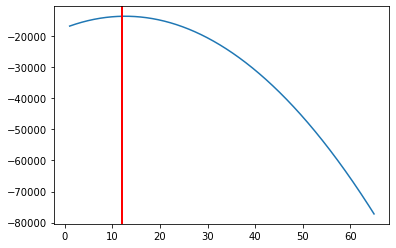

In [399]:
#We can visualise our results below. 
mus = np.linspace(data_min,data_max,1000)
like = []
for mu in mus:
    like.append(-f(mu))
plt.plot(mus, like) # plot a line for the negative log likelihood
plt.axvline(sample_mu.item(), color='red', linewidth=2) # add a red vertical line at the ML estimate of mu

## Fit a Poisson distribution to the sentence length data using MAP estimation

Maximum a posteriori (MAP) inference aims to find parameters that maximise the posterior distribution. It produces single value estimates of model parameters, rather than distributions. Rather than aiming to maximise the likelihood alone, MAP inference aims to find parameters that maximise the posterior.

Now we perform MAP inference by adding a prior to our likelihood, so that we are maximising the posterior density. We first plot the prior with the following parameters that were given.

In [357]:
#as stated in the coursework assignment sheet
prior_mean = 4.0 
prior_sd = 0.1

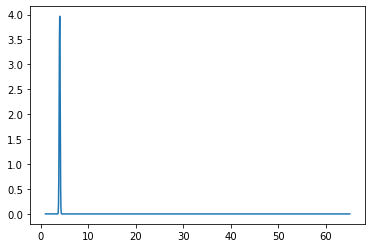

In [400]:
#plotting the prior
mus = np.linspace(data_min,data_max,1000) #range of values created to plot the prior
plt.plot(mus,norm.pdf(mus,loc=prior_mean,scale=prior_sd))

In [401]:
#the negative log likelihood posterior function for a given value of mu is used to evaluate the posterior for a value of mu
def nlposterior(mu):
    loglikelihood_array = norm.logpdf(data,loc=mu,scale=sample_sd)
    loglikelihood = np.sum(loglikelihood_array)
    prior = norm.logpdf(mu, loc=4.0, scale = 0.1)
    return -(loglikelihood+prior)

In [403]:
#minimises the negative log posterior
minimize(nlposterior,0).x

array([6.7496627])

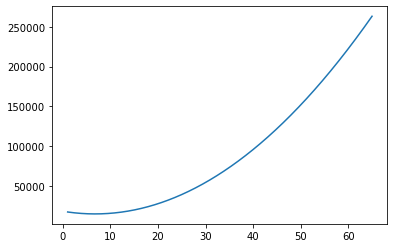

In [345]:
#Visualising the negative log posterior

mus = np.linspace(data_min,data_max,1000) # create an array of 1000 values from 9 to 11.

ys = [] # create an empty list of y coordinates
for mu in mus: # for each value of mu in the range
    ys.append(nlposterior(mu)) # add f(mu) to the list of y coordinates

plt.plot(mus,ys) # plot a line for the negative log likelihood



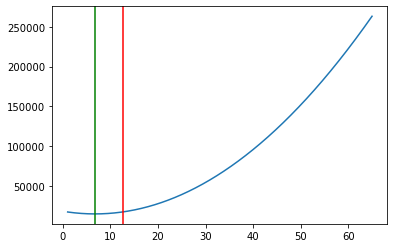

In [360]:
ml_estimate = minimize(f,0).x
map_estimate = minimize(nlposterior,0).x
plt.plot(mus,ys)
plt.axvline(ml_estimate.item(),color='red') # add a red vertical line at the ML estimate of mu
plt.axvline(map_estimate.item(),color='green') # add a green vertical line at the MAP estimate of mu

We can see how significantly the value of mu differs between ML and MAP estimates.

ML: It is a frequentist approach, which assumes the parameter is fixed and unknown. It makes the estimation using only the data.

MAP: It is a Bayesian approach, which assumes the parameter follows a probability distribution and the distribution is unknown. MAP uses both prior and the data to perform the estimation.

### Negative Binomial Distribution

The negative binomial distribution is a discrete probability distribution that models the number of successes in a sequence of independent and identically distributed Bernoulli trials before a specified (non-random) number of failures (denoted r) occurs.

In [361]:
#Fit a Negative binomial distribution to the sentence length data using maximum likelihood.
from statsmodels.discrete.discrete_model import NegativeBinomial

res2 = sm.NegativeBinomial(data, y).fit()
print(res2.summary())
np.exp(res2.params)

Optimization terminated successfully.
         Current function value: 3.417881
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
                     NegativeBinomial Regression Results                      
Dep. Variable:                      0   No. Observations:                 3760
Model:               NegativeBinomial   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Tue, 05 Jan 2021   Pseudo R-squ.:              -1.942e-12
Time:                        01:36:08   Log-Likelihood:                -12851.
converged:                       True   LL-Null:                       -12851.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.011    230.9

const    12.673138
alpha     1.455854
dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Negative Binomial')]

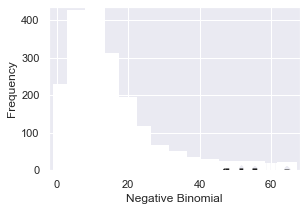

In [451]:
from scipy.stats import nbinom
import seaborn as sns
sns.set(color_codes=True)

nbinom_pd = nbinom.pmf(X, r, P)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, nbinom_pd, 'bo', ms=8, label='nbinom pmf')
ax.plot(X, nbinom_pd, 'bo', ms=8, label='nbinom pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Sales Call", fontsize="18")
plt.title("Negative Binomial Distribution - No. of Sales Call Vs Probability", fontsize="18")
ax.vlines(X, 0, nbinom_pd, colors='b', lw=5, alpha=0.5)

sns.set(rc={'figure.figsize':(4.5,3)})
ax = sns.distplot(data,
                  kde=False,
                  color='black',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Negative Binomial', ylabel='Frequency')

In [370]:
from scipy.optimize import minimize
def f(mu):
    loglikelihood = norm.logpdf(data,loc=mu,scale=sample_sd)
    return -np.sum(loglikelihood)

In [371]:
minimize(f,0).x

array([12.67313679])

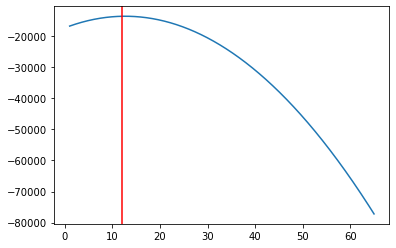

In [375]:
mus = np.linspace(data_min, data_max,1000)
like = []
for mu in mus:
    like.append(-f(mu))
plt.plot(mus,like)
plt.axvline(sample_mu.item(),color='red')

## Task 2 – Classification and Validation

### NAIVE BAYES CLASSIFICATION

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. A Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data. They are probabilistic, which means that they calculate the probability of each tag for a given text, and then output the tag with the highest one. The way they get these probabilities is by using Bayes’ Theorem, which describes the probability of a feature, based on prior knowledge of conditions that might be related to that feature.

The aim is to assign each data point to a class c based on its properties. There are two classes we would like to train our classifier to predict for the ATLAS dataset that has been provided, where value 1 from the ATLAS-label dataset represents a signal, and 0 represents background noise.

Bayes’ theorem is stated mathematically as the following equation:

P(A|B) = {P(B|A) P(A)} / {P(B)} 

Naive assumption to the Bayes’ theorem, which is, independence among the features is:

P(A,B) = P(A)P(B)

In [284]:
import numpy as np
import sklearn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.naive_bayes import GaussianNB

In [274]:
#loading the two ATLAS datasets
ATLAS_data = np.loadtxt("desktop/ATLAS-data.csv",delimiter=',')
ATLAS_labels = np.loadtxt("desktop/ATLAS-labels.csv",delimiter=',')

In [276]:
ATLAS_data
ATLAS_labels

array([0., 0., 0., ..., 1., 1., 0.])

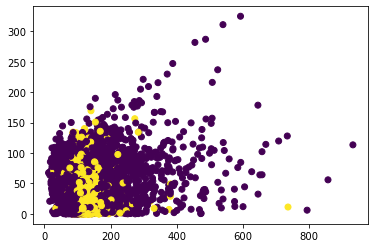

In [281]:
#plotting the data
plt.scatter(ATLAS_data[:,0],ATLAS_data[:,1],c=ATLAS_labels)

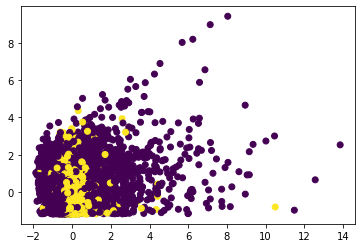

In [286]:
#scaling the data so that it has a mean of 0, and standard deviation 1 and then visualising it again
ATLAS_data_scaled = sklearn.preprocessing.scale(ATLAS_data)
plt.scatter(ATLAS_data_scaled[:,0],ATLAS_data_scaled[:,1],c=ATLAS_labels)

In [381]:
#splitting the data into training and testing dataset for appropriate model evaluation.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ATLAS_data_scaled, ATLAS_labels, test_size=0.1, random_state=69)

In [382]:
#Creating the Naive Bayes model and fitting it to the data
nb = GaussianNB().fit(x_train, y_train)

In [383]:
#calculating the accuracy of the model
predicted = nb.predict(x_test)

print(np.mean(predicted == y_test))

0.741


In [294]:
#For further analysis, the confusion matrix can be analysed
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))

[[371 159]
 [100 370]]


In [387]:
#calculating the accuracy, precision and recall value of the model
from sklearn import metrics

NB_accuracy = metrics.accuracy_score(y_test, predicted)
NB_precision = metrics.precision_score(y_test, predicted)
NB_recall = metrics.recall_score(y_test, predicted)
NB_accuracy, NB_precision, NB_recall

(0.741, 0.6994328922495274, 0.7872340425531915)

In [388]:
#Calculating the F score
NB_F = 2 * ((NB_precision * NB_recall)/NB_precision + NB_recall)
NB_F

3.148936170212766

In [408]:
#calculating the ROC curve for the Naive Bayes model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
nb_auc = roc_auc_score(y_test, predicted)
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))

Naive Bayes: ROC AUC=0.744


In [412]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, predicted)

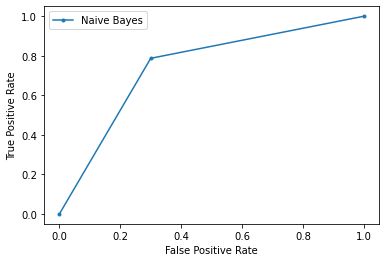

In [413]:
#visualising the naive bayes ROC curve
#area under the curve depicts accuracy of the model
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

## LOGISTIC REGRESSION


Logistic regression models the probabilities for classification problems with two possible outcomes. It's an extension of the linear regression model for classification problems. The logistic function outputs numbers between 0 and 1. Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.

Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function. The sigmoid function maps any real value into another value between 0 and 1.

Logistic Regression Equation: 

y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))

Where y is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x). Each column in your input data has an associated b coefficient (a constant real value) that must be learned from your training data.

In [304]:
#Loading the data and then scaling it.
LR_data = pd.read_csv('desktop/ATLAS-data.csv')
LR_label = pd.read_csv('desktop/ATLAS-labels.csv')
LR_data
LR_data_scaled = sklearn.preprocessing.scale(LR_data)

In [305]:
#splitting the data into training and testing dataset for model evaluation.
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(LR_data, test_size=0.2)

In [306]:
train_df = trainingSet
test_df = testSet

In [311]:
LR_x_train, LR_x_test, LR_y_train, LR_y_test = train_test_split(LR_data_scaled, LR_label, test_size=0.1, random_state=69)

In [312]:
#performing logistic regression to fit the data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [313]:
logreg.fit(LR_x_train,LR_y_train)

/Users/harveenkaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [405]:
y_pred = logreg.predict(LR_x_test)

In [316]:
#Analysing the confusion matrix for the logistic regression model
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(LR_y_test, y_pred)
cnf_matrix

array([[425, 120],
       [144, 311]])

In [317]:
#calculating the accuracy, precision and recall value for the logistic regression model
accuracy = metrics.accuracy_score(LR_y_test, y_pred)
precision = metrics.precision_score(LR_y_test, y_pred)
recall = metrics.recall_score(LR_y_test, y_pred)

In [318]:
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)

Accuracy: 0.736
Precision: 0.7215777262180975
Recall: 0.6835164835164835


In [320]:
#depicts the accuracy of the training dataset
logreg.score(LR_x_train, LR_y_train)

0.7308589843315924

In [321]:
#depicts the accuracy of the testing dataset
logreg.score(LR_x_test, LR_y_test)

0.736

In [322]:
#calculating the ROC curve for the logistic regression model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(LR_y_test, y_pred)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.732


In [409]:
lr_fpr, lr_tpr, _ = roc_curve(LR_y_test, y_pred)

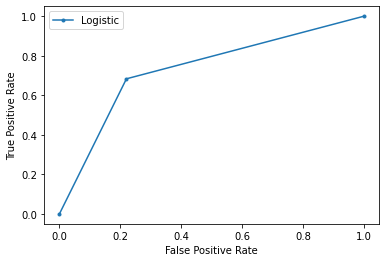

In [421]:
#visualising the logistic ROC curve
#area under the curve depicts accuracy of the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [325]:
#calculating the F score of the logistic regression model
F = 2 * ((precision * recall)/precision + recall)
F

2.734065934065934

Both the models have reasonably fair with a very similar accuracy (Naive Bayes:0.741,Logistic Regression:0.736). Naive Bayes model has performed better than the logistic regression model with a significantly better F score of 3.14 for NB compared to 2.73 for LR and a better ROC curve with ROC AUC value 0.744 for NB and 0.732 for LR.

Hypertuning and further optimization can be performed to improve the models for better results. In this case, however, we can conclude that both Naive Bayes model has delivered better results for the ATLAS data, with better prediction about the particle collision events.